# U.S. Medical Insurance Costs

# Import Modules

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

# Import Data and basic visualization of column headers 

In [5]:
df = pd.read_csv('insurance.csv')
print(df.head(5))

   patient_id  age     sex     bmi  children smoker     region      charges
0           0   19  female  27.900         0    yes  southwest  16884.92400
1           1   18    male  33.770         1     no  southeast   1725.55230
2           2   28    male  33.000         3     no  southeast   4449.46200
3           3   33    male  22.705         0     no  northwest  21984.47061
4           4   32    male  28.880         0     no  northwest   3866.85520


# Description of the dataset as an overview to refer to and validate against

In [6]:
df.describe().round(2)

,patient_id,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00,1338.00
mean,668.50,39.21,30.66,1.09,13270.42
std,386.39,14.05,6.10,1.21,12110.01
min,0.00,18.00,15.96,0.00,1121.87
25%,334.25,27.00,26.30,0.00,4740.29
50%,668.50,39.00,30.40,1.00,9382.03
75%,1002.75,51.00,34.69,2.00,16639.91
max,1337.00,64.00,53.13,5.00,63770.43


# Add new column (patient_id) to .csv file using pandas

In [ ]:
df['patient_id'] = range(0, 0 + len(df))
df.to_csv('insurance.csv', index=False)

#check to see output of adding new column
print(df.head(5))

# Populating the lists with the data from the .csv file

In [7]:
insurance_records = []
with open('insurance.csv') as insurance_csv:
    insurance_reader = csv.DictReader(insurance_csv)
    for i in insurance_reader:
        insurance_records.append(i)
#print(insurance_records)

# Anlysis of the average age 

In [8]:
avg_age = round(df['age'].mean())
print("The average age of our 1338 sample data is " + str(avg_age) + ' years old.')

The average age of our 1338 sample data is 39 years old.


# Analysis of the average age of male vs female

In [9]:
age_male = 0
num_male = 0
age_female = 0
num_female = 0
for record in insurance_records:
    if record['sex'] == 'male':
        num_male += 1
        age_male += float(record['age'])
print(f'There are {num_male} patients who are males in the insurance records')

There are 676 patients who are males in the insurance records


In [10]:
for record in insurance_records:
    if record['sex'] == 'female':
        num_female += 1
        age_female += float(record['age'])
print(f'There are {num_female} patient how are females in the insurance records')

There are 662 patient how are females in the insurance records


In [11]:
total_num = num_male + num_female
print(f'There are {total_num} medical insurance patient records') 

There are 1338 medical insurance patient records


In [12]:
avg_male_age = round(age_male/num_male, )
avg_female_age = round(age_female/num_female,)
total_num = round(num_male + num_female,)
print("There are " + str(total_num) + " data samples in our analysis.")
print("The average age for male is " + str(avg_male_age) + ' years old.')
print("The average age for female is " + str(avg_female_age) + ' years old.')

There are 1338 data samples in our analysis.
The average age for male is 39 years old.
The average age for female is 40 years old.


# Visualization of distribution of sexes Males vs Female Patients

sex
female    662
male      676
dtype: int64


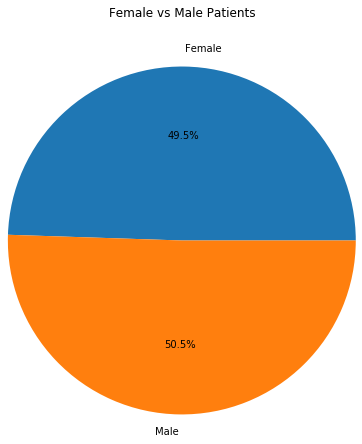

50.5 % of our 1338 insurers are male vs 49.5 % are female.


In [13]:
size_by_sex = df.groupby('sex').size()
print(size_by_sex)
my_labels = 'Female','Male'
plt.pie(size_by_sex,labels = my_labels,autopct='%1.1f%%',radius=2)
plt.title('Female vs Male Patients', y=1.5)
plt.show()
male_percent = round(num_male * 100/(num_male + num_female),1)
female_percent = 100 - male_percent
print(str(male_percent) + " % of our 1338 insurers are male vs " + str(female_percent) + " % are female.")

# Analysis of where the majority of patients are from (Region)

In [14]:
for records in insurance_records:
    records = df.groupby(['region']).size()
    
print(records)


region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64


# Visualization of distribution of patients based on region within US

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64


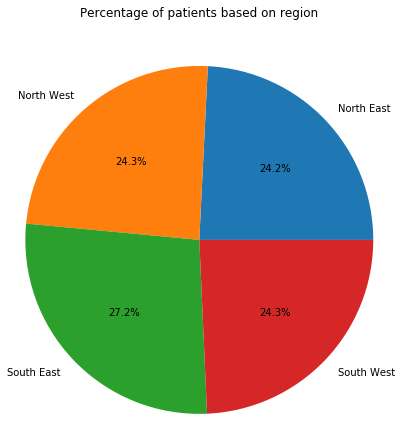

The distirbution of the number of patients across the different regions of the US is similar with South East being the highest


In [15]:
count_region = df.groupby('region').size()
print(count_region)
my_labels = ['North East','North West', 'South East', 'South West']
plt.pie(count_region,labels = my_labels, autopct='%1.1f%%', radius=2)
plt.title('Percentage of patients based on region', y=1.5)
plt.show()
print('The distirbution of the number of patients across the different regions of the US is similar with South East being the highest')

# Analysis of cost (charges) between smokers and non smokers

In [16]:
num_smoker = 0
smoker_charges = 0
num_non_smoker = 0
non_smoker_charges = 0

In [17]:
for record in insurance_records:
    if record['smoker'] == 'yes':
        num_smoker += 1
        smoker_charges += float(record['charges'])
    if record['smoker'] == 'no':
        num_non_smoker += 1
        non_smoker_charges += float(record['charges'])
        
avg_smoker_charges = round(smoker_charges/ num_smoker, 2)
avg_non_smoker_charges = round(non_smoker_charges/ num_non_smoker, 2)
diff_smoker_charges = avg_smoker_charges - avg_non_smoker_charges
smoke_percent = round(num_smoker*100 / total_num, 1)

non_smoke_percent = round(num_non_smoker*100/ total_num, 1)    
print(f'The number of "SMOKERS" from the insurance records is {num_smoker} and on average the cost of medical insurance costs ${avg_smoker_charges}')
print(f'The number of "NON-SMOKERS" from the insurance records is {num_non_smoker} and on average the cost of medical insurance costs ${avg_non_smoker_charges}')
print(f'The insurance cost for a smoker is ${diff_smoker_charges} more expensive than for a non_smoker')



The number of "SMOKERS" from the insurance records is 274 and on average the cost of medical insurance costs $32050.23
The number of "NON-SMOKERS" from the insurance records is 1064 and on average the cost of medical insurance costs $8434.27
The insurance cost for a smoker is $23615.96 more expensive than for a non_smoker


# Visualization of distribution of patients based on Smokers vs Non-Smokers

smoker
no     1064
yes     274
dtype: int64


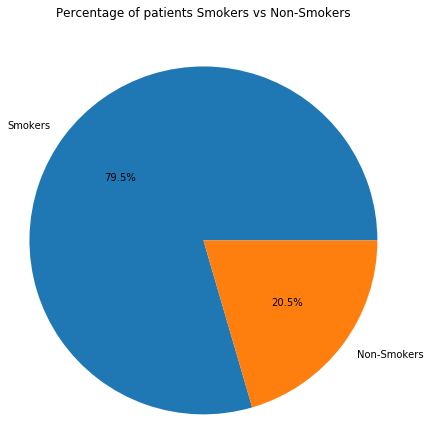

Out of the 1338 patients, 20.5% smoke and 79.5% do not


In [18]:
count_smokers = df.groupby('smoker').size()
print(count_smokers)
my_labels = ['Smokers','Non-Smokers']
plt.pie(count_smokers,labels = my_labels, autopct='%1.1f%%', radius=2)
plt.title('Percentage of patients Smokers vs Non-Smokers', y=1.5)
plt.show()
print(f'Out of the {total_num} patients, {smoke_percent}% smoke and {non_smoke_percent}% do not')

# Analysis of average BMI of patients based on gender

In [19]:
bmi_male = 0
bmi_female = 0
for record in insurance_records:
    if record['sex'] == 'male':
        bmi_male += float(record['bmi'])
    if record['sex'] == 'female':
        bmi_female += float(record['bmi'])
       
avg_bmi_male = round(bmi_male/num_male, 2)    
avg_bmi_female = round(bmi_female/num_female, 2)
print('Average BMI for male is ' + str(avg_bmi_male) + ".")
print('Average BMI for female is ' + str(avg_bmi_female) + ".")

Average BMI for male is 30.94.
Average BMI for female is 30.38.


In [20]:
labels_bmi_group = ['Underweight','Normal','Overweight','Obese']
bins_bmi_group = [0, 18.5, 25, 30, 100]
bmi_groups = pd.cut(df['bmi'], bins=bins_bmi_group, labels=labels_bmi_group)
bmi_groups_size = bmi_groups.to_frame(0).groupby(0)[0].size()
print(bmi_groups_size)

df_bmi_charges = df[['bmi','charges']]
df_bmi_charges['bmi'] = pd.cut(df['bmi'], bins=bins_bmi_group, labels=labels_bmi_group)

print(df_bmi_charges.groupby('bmi').mean().round())

0
Underweight     21
Normal         226
Overweight     386
Obese          705
Name: 0, dtype: int64
             charges
bmi                 
Underweight   8658.0
Normal       10435.0
Overweight   10998.0
Obese        15561.0


C:\Users\Gebruiker\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Visualization of Insured by BMI

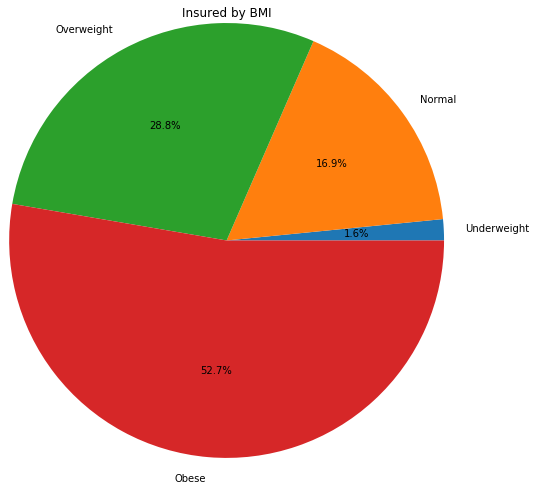

In [21]:
plt.pie(bmi_groups_size,labels = labels_bmi_group,autopct='%1.1f%%',radius=2.5)
plt.title('Insured by BMI', y=1.5)
plt.show()